<a href="https://colab.research.google.com/github/anupama0527/anupama0527.github.io/blob/main/Image_Classification_using_CiFAR10_dataset_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
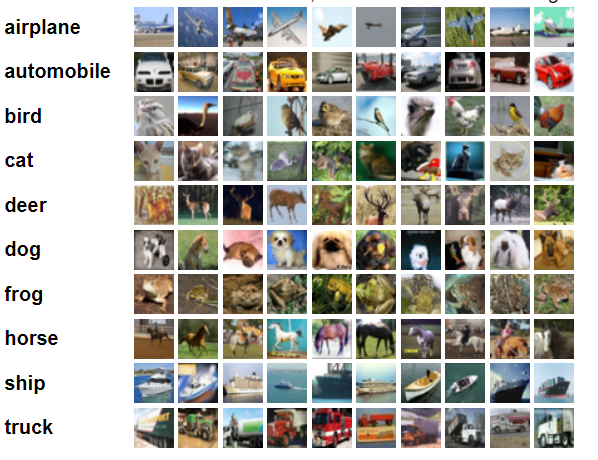

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

# New Section

The archive contains the files data_batch_1, data_batch_2, ..., data_batch_5, as well as test_batch. Each of these files is a Python "pickled" object produced with cPickle.

each of the batch files contains a dictionary with the following elements:
data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:
label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc

Binary version

The binary version contains the files data_batch_1.bin, data_batch_2.bin, ..., data_batch_5.bin, as well as test_batch.bin.

the first byte is the label of the first image, which is a number in the range 0-9. The next 3072 bytes are the values of the pixels of the image. The first 1024 bytes are the red channel values, the next 1024 the green, and the final 1024 the blue. The values are stored in row-major order, so the first 32 bytes are the red channel values of the first row of the image.

Each file contains 10000 such 3073-byte "rows" of images, although there is nothing delimiting the rows. Therefore each file should be exactly 30730000 bytes long.

There is another file, called batches.meta.txt. This is an ASCII file that maps numeric labels in the range 0-9 to meaningful class names. It is merely a list of the 10 class names, one per row. The class name on row i corresponds to numeric label i.

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [ ]:
import gradio as gr

In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
             'dog', 'frog', 'horse', 'ship', 'truck']


# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


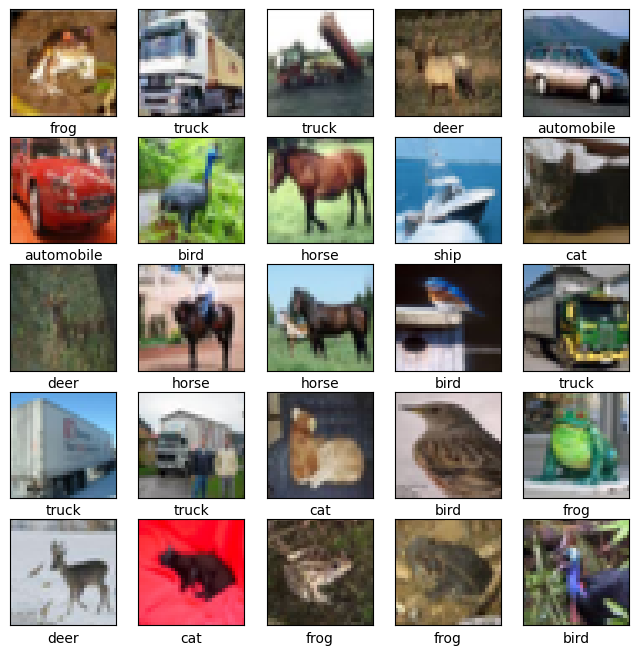

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Tensorflow sequential** is the group containing the stack of linear format that consists of various layers of the library package tf.keras.Model. This Sequential class is inherited from the Module, Layer, and Model classes. The basic functionality of Sequential is to make the provision of inferences and training of the module. https://www.educba.com/tensorflow-sequential/

Activation: An activation function is applied to the output of each neuron in a neural network to introduce non-linearity into the model. Non-linear activation functions such as ReLU (Rectified Linear Unit) are commonly used in CNNs to help the network learn more complex features and patterns in images.

MaxPooling: MaxPooling is a pooling operation that reduces the spatial dimensions (height and width) of an input volume, while preserving the depth dimension. MaxPooling is commonly used in CNNs to downsample the output of convolutional layers and reduce the number of parameters in the model, while preserving important features in the input image.

Conv2D: Conv2D is a convolutional layer that performs a 2D convolution operation on an input volume. The Conv2D layer applies a set of filters (also known as kernels or weights) to the input image, which are convolved over the image to produce a set of feature maps. The output of a Conv2D layer is typically passed through an activation function and followed by a MaxPooling layer to downsample the feature maps. Conv2D layers are the fundamental building blocks of most CNNs and are used to extract hierarchical features from images.



CNN: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

ReLU stands for Rectified Linear Unit and is an activation function commonly used in artificial neural networks, particularly in convolutional neural networks (CNNs) used for image processing tasks.

The ReLU function applies the following mathematical operation to the input x:

f(x) = max(0, x)

In other words, the output of the function is zero for all negative values of x and equal to x for all positive values of x. This means that the ReLU function introduces non-linearity into the model, while also allowing the model to learn more complex features and patterns in images.

ReLU has become a popular choice for activation functions in CNNs due to its simplicity, computational efficiency, and ability to mitigate the vanishing gradient problem (which can occur when using other activation functions such as sigmoid or tanh). Additionally, ReLU has been shown to improve the performance of deep neural networks and reduce overfitting, making it a key component in many state-of-the-art CNN architectures.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

**Adam (Adaptive Moment Estimation)** is a popular optimization algorithm used in deep learning, particularly in neural networks with many layers and parameters. It is an extension of stochastic gradient descent (SGD), which is a common optimization algorithm used to update the weights and biases in a neural network during the training process.

Adam combines the advantages of two other optimization algorithms: AdaGrad, which adapts the learning rate based on the historical gradient, and RMSProp, which uses an exponentially decaying average of past squared gradients to update the learning rate.

The main advantage of Adam is that it is computationally efficient and can be used with sparse gradients. It also dynamically adapts the learning rate for each parameter based on the past gradients and the past squared gradients. This means that the learning rate is decreased for parameters with large gradients and increased for parameters with small gradients.

Adam also incorporates bias correction to improve the accuracy of the parameter updates during the early stages of training. This helps to overcome the tendency of the algorithm to overshoot the optimal weights and biases, which can occur when the initial learning rate is too high.

Overall, Adam has become a popular choice for optimization in deep learning due to its efficiency, adaptability, and ability to handle sparse gradients.

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 49s 30ms/step - loss: 1.5097 - accuracy: 0.4497 - val_loss: 1.2534 - val_accuracy: 0.5412
Epoch 2/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1480 - accuracy: 0.5927 - val_loss: 1.1128 - val_accuracy: 0.6062
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9988 - accuracy: 0.6486 - val_loss: 0.9694 - val_accuracy: 0.6614
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8995 - accuracy: 0.6842 - val_loss: 0.9758 - val_accuracy: 0.6599
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8210 - accuracy: 0.7120 - val_loss: 0.9167 - val_accuracy: 0.6815
Epoch 6/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7636 - accuracy: 0.7321 - val_loss: 0.8805 - val_accuracy: 0.6936
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7137 - accuracy: 0.7502 - val_loss: 0.9223 -

313/313 - 2s - loss: 0.8578 - accuracy: 0.7154 - 2s/epoch - 8ms/step


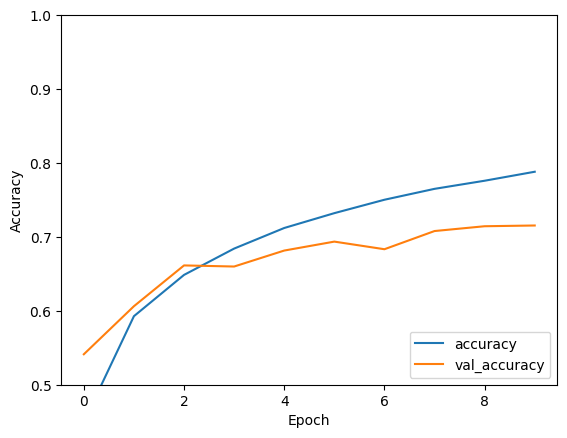

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [ ]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.715399980545044


In [ ]:
# Save the model
model.save("image_classification_model.h5")

In [ ]:
# Load the saved model
model = tf.keras.models.load_model('image_classification_model.h5')




In [ ]:
(_, _), (test_images, test_labels) = datasets.cifar10.load_data()


In [ ]:
test_images = test_images.astype('float32') / 255
test_labels = tf.keras.utils.to_categorical(test_labels)


In [ ]:
#predicted_classes = model.predict_classes(test_images)
predictions_classes = np.argmax(model.predict(test_images),axis=1)

313/313 [==============================] - 3s 8ms/step


In [ ]:
#for i in range(len(test_images)):#for all images
for i in range(25): #for first 25 test images
    print('Actual label:', test_labels[i])
    print('Predicted label:', predictions_classes[i])


Actual label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted label: 3
Actual label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label: 8
Actual label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label: 8
Actual label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label: 0
Actual label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted label: 6
Actual label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted label: 6
Actual label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label: 1
Actual label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted label: 6
Actual label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted label: 3
Actual label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label: 1
Actual label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label: 0
Actual label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted label: 9
Actual label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted label: 5
Actual label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted label: 7
Actual label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted label: 9
Actual label: [0. 0. 0. 0

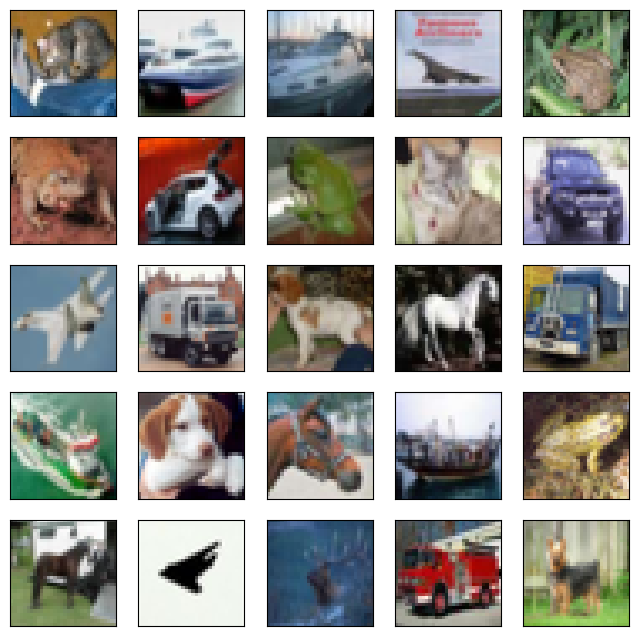

In [ ]:
#display first 25 test images
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])

plt.show()

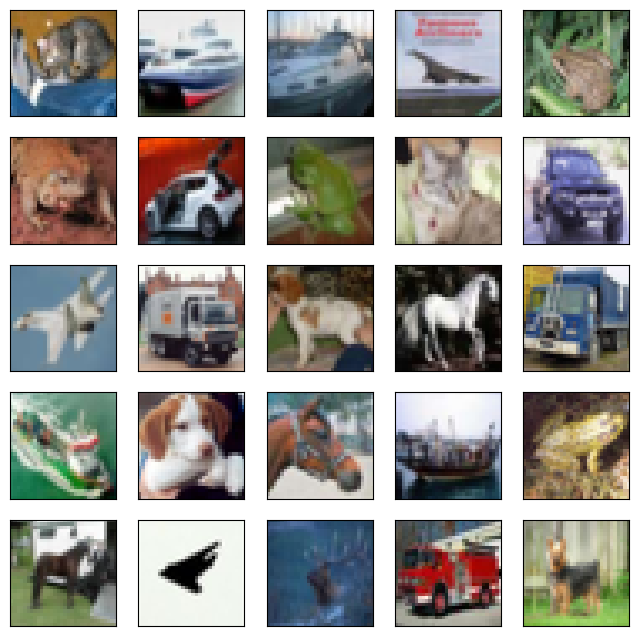

In [ ]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])

plt.show()

In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,32,32,3)
  prediction=model.predict(img_3d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(10)}

In [ ]:
image = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=10)
gr.Interface(fn=predict_image, inputs=image, outputs=label, capture_session=True).launch(debug='True')

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)
<ipython-input-25-d4ff3d14c9e2>:3: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  gr.Interface(fn=predict_image, inputs=image, outputs=labe

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 18ms/step


In [ ]:
fig = px.density_heatmap(df, x="x", y="y",
                         color_continuous_scale = [(0, "rgba(0, 255, 0, 0)"),
                                                   (0.5, "rgba(0, 255, 0, 0.5)"),
                                                   (1, "rgba(0, 255, 0, 1)")],
                         height=810, width=1440)
fig.add_layout_image(
        dict(
            source="https://docs.google.com/uc?export=download&id=1JEyyYCse6sWM3yMUwDG2l7XzaGxej-VZ",
            xref="x",
            yref="y",
            x=0,h
            y=0,
            sizex=1920,
            sizey=1080,
            sizing="stretch",
            opacity=1,
            layer="below")
)
fig.update_layout(template="plotly_white")
fig.show()